## Enführung in das Maschinelle Lernen mit einem Perzeptron
Ein Schwellenwertelement (Perzeptron) kann bereits zur Klassifizierung von Merkmalen benutzt werden. Eine recht einfache Klassifizierung ist die Generierung einer BOOLschen Funktion, die beide Klassen, also 0 und 1 unterscheiden kann. Im folgenden Beispiel wird ein Perzeptron benutzt, um die AND Funktion zu "lernen" und danach andere Kombinationen von Wertepaaren zu klassifizieren. Hierbei wird sklearn eingesetzt, welches ein sehr leistungsfähiges Werkzeug für das maschinelle Lernen unter python darstellt. 

In [165]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Perceptron

Zuerst wird ein Array aus Trainingsdaten erzeugt. Diese Werte werden dem Perzeptron während der Trainingsphase als Eingangsdaten präsentiert. 

In [166]:
data_train = np.array([[0.0, 0.0],
                [1.0, 0.0],
                [0.0, 1.0],
                [1.0, 1.0]])

Die Trainingsdaten müssen mit den gewünschten Ausgangsdaten verknüpft werden, die das Netz "lernen" soll. Hierzu wird ein weiteres Array benutzt. Die "Target" Daten passen vom Index zu den Eingangsdaten, so dass z.B. das Wertepaar 0/0 der Klasse 0 und 0/1 ebenfalls der Klasse 0 zugeordnet wird. Hier wird die AND Verknüpfung erzeugt.  

In [167]:
target = np.array([0.0,0.0,0.0,1.0])

Jetzt muss nur noch ein Perceptron erzeugt und trainiert werden. Die Funktion fit des Objektes Perceptron benutzt die Eingangsdaten und die gewünschten Ausgangsdaten, um die Gewichte und den Schwellenwert des Perzepztrons iterativ zu ermitteln. Die maximale Anzahl der Iteration wird mit max_iter auf 4000 begrenzt. Die Lernrate eta beträgt 0.1 siehe dazu den Vorlesungsskript und die Erläuterung zum Training mit der "Delta"-Rule.

In [168]:
ppn = Perceptron(max_iter=4000, eta0=0.1, random_state=1)
ppn.fit(data_train, target)

Perceptron(eta0=0.1, max_iter=4000, random_state=1)

Zum Test des trainierten Perzeptrons werden Testdaten erzeugt. Sie dienen zur Verfikation, dass die Klassen gut voneinander getrennt werden. Außerdem sollen sie die Verallgemeinerung des Perzeptrons widerspiegeln, so dass z.B. das Wertepaar 0.8/0.8 der Klasse 1 zugeordnet wird.

In [169]:
test_data = np.array([[0.0, 0.0],
                [0.1, 0.1],
                [0.2, 0.3],
                [0.8, 0.8],
                [0.6, 0.2],
                [0.3, 0.2],
                [0.7, 0.6],
                [0.5, 0.5],
                [0.55, 0.6]])

Die Klassifizierung des Perzeptrons wird auch als "Prediction", also Vorhersage bezeichnet. Hierfür besitzt das Objekt Perceptron eine Funktion predict. Diese Funktion wird auf unseren Testdatensatz angewendet und das Ergebnis ausgedruckt.

In [170]:
pred = ppn.predict(test_data)

In [171]:
Length = test_data.shape[0]
for i in range(0,Length):
    print("Input: ", test_data[i], "Klasse: ",pred[i])

Input:  [0. 0.] Klasse:  0.0
Input:  [0.1 0.1] Klasse:  0.0
Input:  [0.2 0.3] Klasse:  0.0
Input:  [0.8 0.8] Klasse:  1.0
Input:  [0.6 0.2] Klasse:  0.0
Input:  [0.3 0.2] Klasse:  0.0
Input:  [0.7 0.6] Klasse:  1.0
Input:  [0.5 0.5] Klasse:  0.0
Input:  [0.55 0.6 ] Klasse:  1.0


Man erkennt, dass alle Muster gut klassifiziert, also im Bereich der Erwartungen liegen. Um diese Klassifikation zu visualisieren wird die folgende Funktion verwendet, die auch die Klassifikationsgrenze des Perzeptron farblich einzeichnet.

In [172]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('x1')
    plt.ylabel('x2')

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

    plt.legend(loc='upper left')
    plt.show()

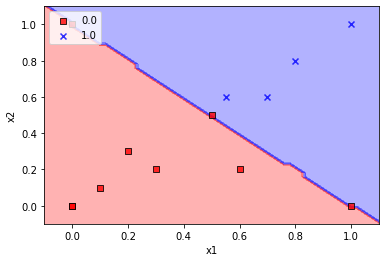

In [173]:
X_combined = np.vstack((data_train, test_data))
y_combined = np.hstack((target, pred))

plot_decision_regions(X=X_combined,y=y_combined,classifier=ppn)

Durch zusätzliche Trainigsdaten kann die Grenze verschoben werden.
Auch können andere Klassifikatoren eingesetzt werden, z.B. eine Support Vector Machine oder ein Multilayer Perceptron.
Hier die Variante mit MLP:

In [174]:
from sklearn.neural_network import MLPClassifier

In [175]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(data_train, target)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [176]:
pred = mlp.predict(test_data)

In [177]:
Length = test_data.shape[0]
for i in range(0,Length):
    print("Input: ", test_data[i], "Klasse: ",pred[i])

Input:  [0. 0.] Klasse:  0.0
Input:  [0.1 0.1] Klasse:  0.0
Input:  [0.2 0.3] Klasse:  0.0
Input:  [0.8 0.8] Klasse:  1.0
Input:  [0.6 0.2] Klasse:  0.0
Input:  [0.3 0.2] Klasse:  0.0
Input:  [0.7 0.6] Klasse:  0.0
Input:  [0.5 0.5] Klasse:  0.0
Input:  [0.55 0.6 ] Klasse:  0.0


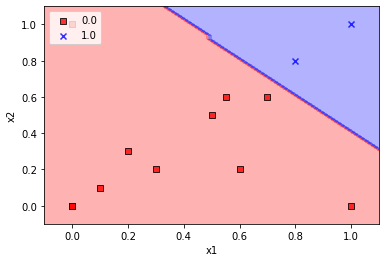

In [178]:
X_combined = np.vstack((data_train, test_data))
y_combined = np.hstack((target, pred))

plot_decision_regions(X=X_combined,y=y_combined,classifier=mlp)

Erkennbar ist, dass das MLP die Schwelle weiter nach "oben" setzt. Hier sollten dann noch weitere Trainingsdaten z.B. für die Wertepaare größer als 0.5/0.5 mit Klasse 1 erzeugt werden:  

In [179]:
mlp_train = np.array([[0.0, 0.0],
                [1.0, 0.0],
                [0.0, 1.0],
                [1.0, 1.0],
                [0.8, 0.8],
                [0.7, 0.7],
                [0.6, 0.6]])

In [180]:
mlp_target = np.array([0.0,0.0,0.0,1.0,1.0,1.0,1.0])

In [181]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(mlp_train, mlp_target)
pred = mlp.predict(test_data)
Length = test_data.shape[0]
for i in range(0,Length):
    print("Input: ", test_data[i], "Klasse: ",pred[i])

Input:  [0. 0.] Klasse:  0.0
Input:  [0.1 0.1] Klasse:  0.0
Input:  [0.2 0.3] Klasse:  0.0
Input:  [0.8 0.8] Klasse:  1.0
Input:  [0.6 0.2] Klasse:  0.0
Input:  [0.3 0.2] Klasse:  0.0
Input:  [0.7 0.6] Klasse:  1.0
Input:  [0.5 0.5] Klasse:  0.0
Input:  [0.55 0.6 ] Klasse:  0.0


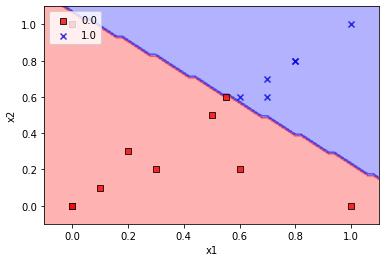

In [182]:
X_combined = np.vstack((mlp_train, test_data))
y_combined = np.hstack((mlp_target, pred))

plot_decision_regions(X=X_combined,y=y_combined,classifier=mlp)